In [ ]:
#https://github.com/nipponjo/tts-arabic-pytorch?tab=readme-ov-file

In [1]:
import torch
import matplotlib.pyplot as plt
import IPython

In [2]:
use_cuda_if_available = True
device = torch.device(
    'cuda' if torch.cuda.is_available() and use_cuda_if_available else 'cpu')

### Test FastPitch

In [3]:
from models.fastpitch import FastPitch
model = FastPitch('pretrained/fastpitch_ar_adv.pth')
model = model.to(device=device)

mel_spec = model.ttmel("اَلسَّلامُ عَلَيكُم يَا صَدِيقِي")
# mel_spec = model.ttmel("أَهلاً وَسَهلاً")

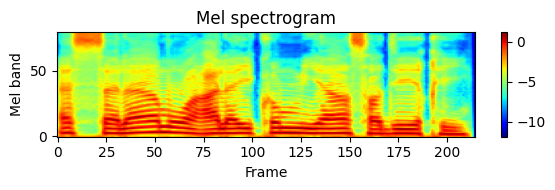

In [4]:
fig, ax = plt.subplots(figsize=(6, 2))
im = ax.imshow(mel_spec.cpu(), origin='lower', aspect='auto', cmap='jet')
fig.colorbar(im, ax=ax)
ax.set_xlabel('Frame')
ax.set_ylabel('Mel band')
ax.set_title("Mel spectrogram")
fig.tight_layout()

In [5]:
from models.fastpitch import FastPitch2Wave
model = FastPitch2Wave('pretrained/fastpitch_ar_adv.pth')
model = model.to(device=device)

wave, mel_spec = model.tts("اَلسَّلامُ عَلَيكُم يَا صَدِيقِي", return_mel=True, denoise=0.005)

print("Audio output (FastPitch)")
IPython.display.Audio(data=0.5*wave, rate=22050, normalize=False)

Audio output (FastPitch)


In [6]:
text_unvoc = "اللغة العربية هي أكثر اللغات السامية تحدثا، وإحدى أكثر اللغات انتشارا في العالم"
wave_shakkala = model.tts(text_unvoc, vowelizer='shakkala')
wave_shakkelha = model.tts(text_unvoc, vowelizer='shakkelha')
IPython.display.display(
    IPython.display.Audio(data=0.5*wave_shakkala, rate=22050, normalize=False),
    IPython.display.Audio(data=0.5*wave_shakkelha, rate=22050, normalize=False)
    )

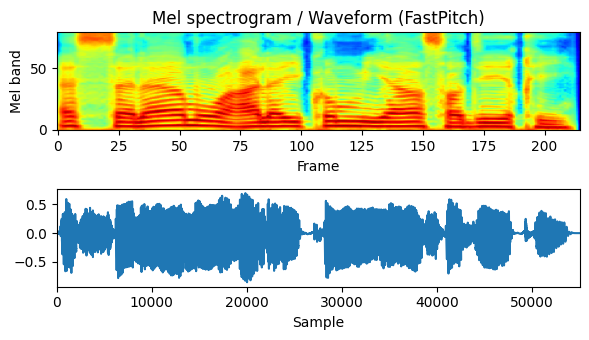

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3.5))
ax1.imshow(mel_spec.cpu(), origin='lower', aspect='auto', cmap='jet')
ax1.set_xlabel('Frame')
ax1.set_ylabel('Mel band')
ax1.set_title("Mel spectrogram / Waveform (FastPitch)")
ax2.plot(wave)
ax2.set_xlim(0, len(wave))
ax2.set_xlabel('Sample')
fig.tight_layout()

### Test Multispeaker

In [8]:
from models.fastpitch import FastPitch2Wave
model = FastPitch2Wave('pretrained/fastpitch_ar_mse.pth')
model = model.to(device=device)

In [9]:
text = "اَلسَّلامُ عَلَيكُم يَا صَدِيقِي"
wave, mel_spec = model.tts(text, return_mel=True, denoise=0.005, speaker_id=2)

print("Audio output (FastPitch)")
IPython.display.Audio(data=0.5*wave, rate=22050, normalize=False)

Audio output (FastPitch)


### Test Tacotron2

In [10]:
from models.tacotron2 import Tacotron2Wave
model = Tacotron2Wave('pretrained/tacotron2_ar_adv.pth')
model = model.to(device=device)

wave, mel_spec = model.tts(".اَلسَّلامُ عَلَيكُم يَا صَدِيقِي", return_mel=True, denoise=0.005)

print("Audio output (Tacotron2)")
IPython.display.Audio(data=0.5*wave, rate=22050, normalize=False)

Audio output (Tacotron2)


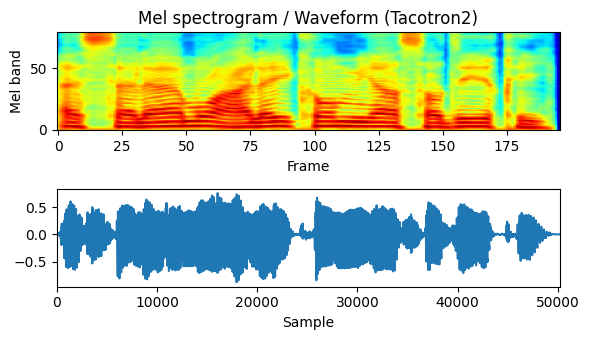

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3.5))
ax1.imshow(mel_spec.cpu(), origin='lower', aspect='auto', cmap='jet')
ax1.set_xlabel('Frame')
ax1.set_ylabel('Mel band')
ax1.set_title("Mel spectrogram / Waveform (Tacotron2)")
ax2.plot(wave)
ax2.set_xlim(0, len(wave))
ax2.set_xlabel('Sample')
fig.tight_layout()